,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi2,age2,children2,bmi_smoker,age_smoker,age_bmi,age_bmi_lg,charges_lg
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016,0.100717,0.988380,0.023855,-0.018383,0.144777,0.879840,0.890195,0.527807
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184,0.046190,-0.020460,0.017917,0.089114,0.069657,0.006280,0.002711,0.005644
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205,0.991400,0.112804,0.003777,0.108741,0.013957,0.539637,0.523898,0.132678
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914,0.012470,-0.003259,0.923007,0.006249,0.020320,0.043180,0.082787,0.161317
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945,0.007047,-0.026120,-0.009131,0.974487,0.926984,-0.022946,-0.019079,0.665539
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210,0.192981,0.300772,0.038699,0.845120,0.789253,0.334754,0.334514,0.892996
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829,-0.143856,-0.000606,0.004598,-0.048467,-0.029346,-0.064660,-0.054716,-0.017830
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265,0.279177,-0.009817,-0.023622,0.095453,0.074633,0.104261,0.101313,0.015803
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000,-0.013081,0.008336,0.035967,-0.033644,-0.048784,0.013495,0.010760,-0.041633
bmi2,0.100717,0.046190,0.991400,0.012470,0.007047,0.192981,-0.143856,0.279177,-0.013081,1.000000,0.104462,0.002952,0.111540,0.015322,0.530853,0.505252,0.124932


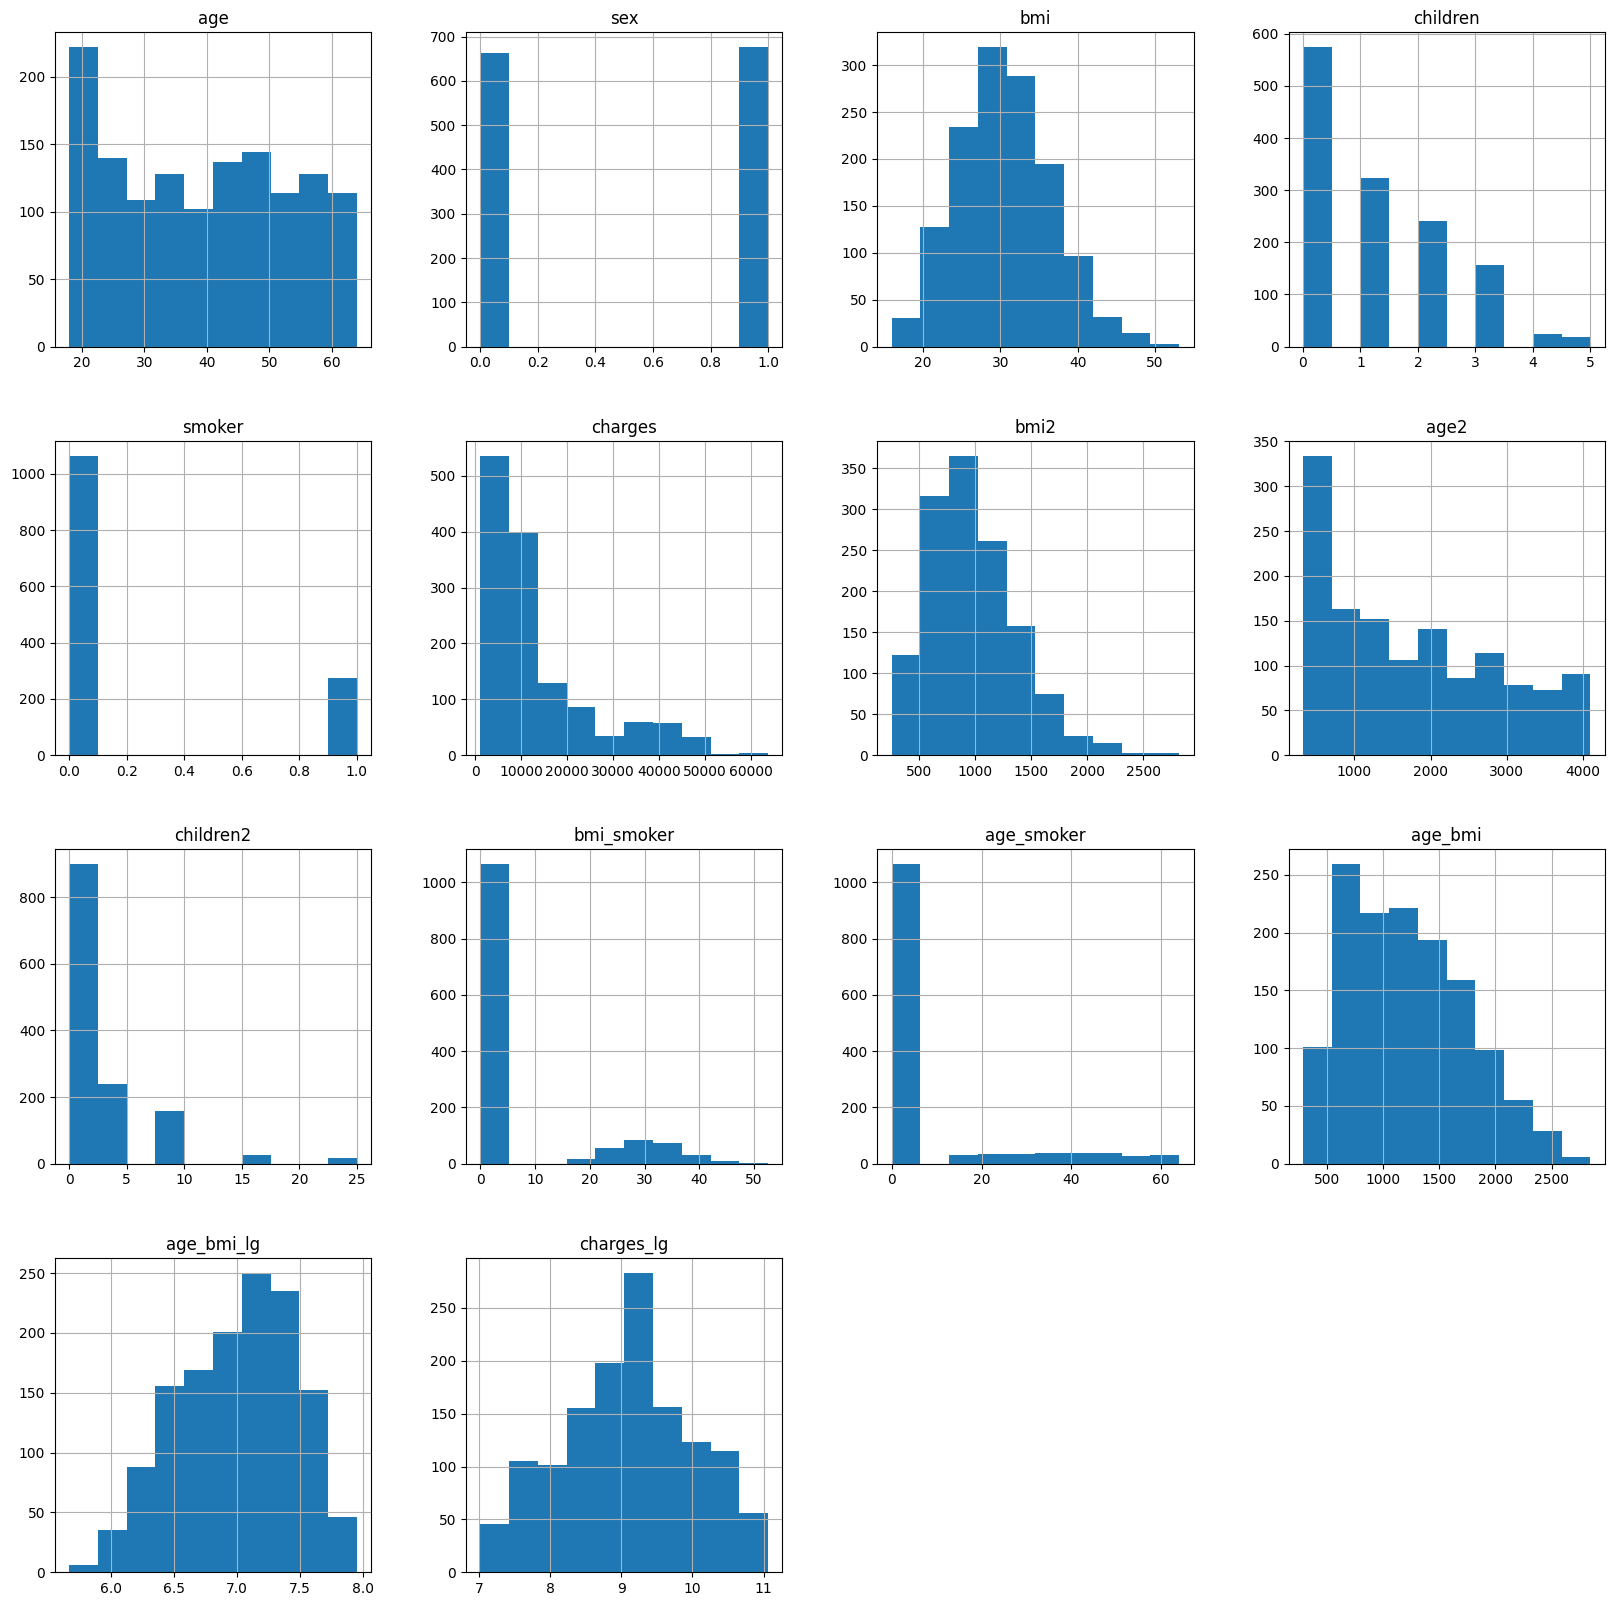

In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("insurance.csv")


df = pd.get_dummies(df, columns=['region'], drop_first=True)
df["smoker"] = [1 if i == "yes" else 0 for i in df["smoker"].values]
df["sex"] = [1 if i == "male" else 0 for i in df["sex"].values]

df["bmi2"] = df["bmi"] ** 2
df["age2"] = df["age"] ** 2
df["children2"] = df["children"] ** 2

df["bmi_smoker"] = df["bmi"] * df["smoker"]
df["age_smoker"] = df["age"] * df["smoker"]
df["age_bmi"] = df["age"] * df["bmi"]

df["age_bmi_lg"] = np.log1p(df["age_bmi"])
df["charges_lg"] = np.log1p(df["charges"])

df.hist(figsize=(20, 20))
df.corr()

so we can use *charges_lg* instead of *charges* cause its strong left skew with long tail

In [20]:
df.drop(columns=['charges'], axis=1, inplace=True)

In [21]:
scaler = StandardScaler()
scaler.fit(df)
df_sc = scaler.transform(df)
train, test = train_test_split(df_sc, test_size=0.3, random_state=42)

X_train = train[:, :-1]
y_train = train.T[-1]

X_test = test[:, :-1]
y_test = test.T[-1]


In [22]:
ridge_reg = Ridge()
param_grid_l2 = [
    {'alpha': [0.005, 0.001, 0.01, 0.05, 0.1, 1, 10]}
]
grid_search_l2 = GridSearchCV(ridge_reg, param_grid_l2, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_l2.fit(X_train, y_train)

grid_search_l2.best_params_, grid_search_l2.best_score_

({'alpha': 1}, np.float64(-0.18050638891927734))

In [23]:
lasso_reg = Lasso()
param_grid_l1 = [
    {'alpha': [0.005, 0.001, 0.01, 0.05, 0.1, 1, 10]}
]
grid_search_l1 = GridSearchCV(lasso_reg, param_grid_l1, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_l1.fit(X_train, y_train)

grid_search_l1.best_params_, grid_search_l1.best_score_

d:\Projects\ml\LinearRegression\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.778e-01, tolerance: 7.617e-02
  model = cd_fast.enet_coordinate_descent(


({'alpha': 0.001}, np.float64(-0.18036812037973465))

In [24]:
model = LinearRegression() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Coeff: {model.coef_}\nIntercept: {model.intercept_}\nMSE: {mse:.2f}\nR2: {r2:.2f}")

Coeff: [-0.31393938 -0.04248025 -0.27852793  0.15802452  0.54468743 -0.03762854
 -0.06534673 -0.07317487 -0.03608707  0.3338352  -0.03651928  0.73484446
 -0.62451696  0.05536355  0.6832648 ]
Intercept: 0.0004733590973937246
MSE: 0.16
R2: 0.84


In [32]:
knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance')
param_grid_knn = [
    {'n_neighbors': list(range(3, 20)), 'weights': ['distance', 'uniform']}
]
grid_search_knn = GridSearchCV(knn_reg, param_grid=param_grid_knn, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_knn.fit(X_train, y_train)
grid_search_knn.best_params_, grid_search_knn.best_score_

({'n_neighbors': 19, 'weights': 'distance'}, np.float64(-0.18873183234565893))

d:\Projects\ml\LinearRegression\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


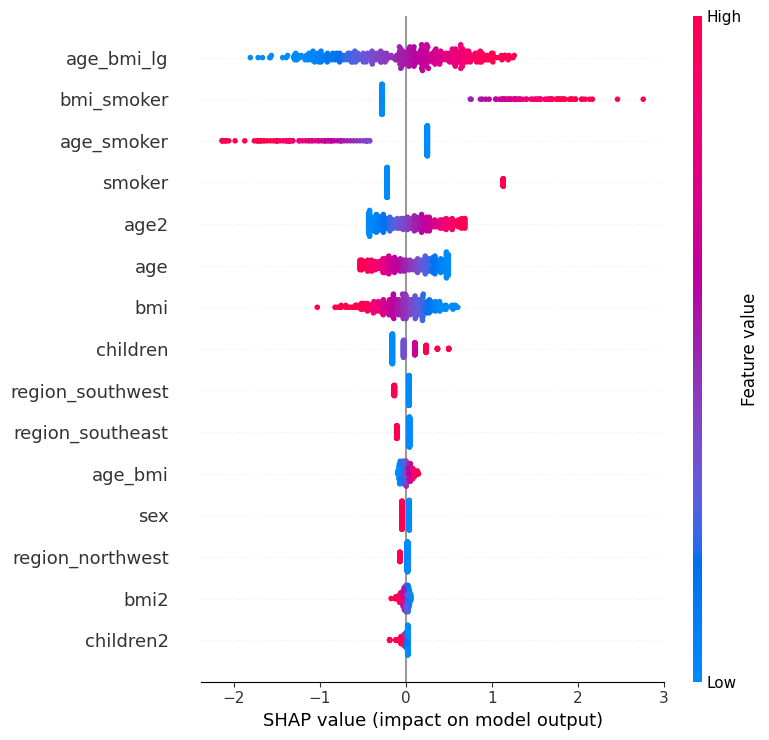

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=df.columns, sort=True)